In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from h2o.automl import H2OAutoML
import h2o

# Importation du fichier kaggle

In [14]:
df_train_kaggle = pd.read_csv('../data/kaggle.csv')
df_train_kaggle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21459 entries, 0 to 21458
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     21459 non-null  object
 1   Emotion  21459 non-null  object
dtypes: object(2)
memory usage: 335.4+ KB


In [15]:
df_train_kaggle.Emotion.unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'happy'],
      dtype=object)

Text(-24.680555555555557, 0.5, 'Count')

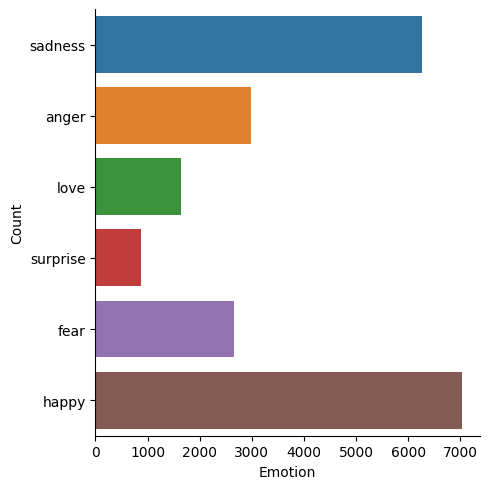

In [16]:
sns.catplot(y='Emotion', kind='count', data=df_train_kaggle) 
plt.xlabel("Emotion") 
plt.ylabel("Count") 

In [18]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM Temurin-11.0.14.1+1 (build 11.0.14.1+1, mixed mode)
  Starting server from C:\Users\USER\Documents\PROJET\PYTHON\I FEEL GOOD\I-feel-good\h2o\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\USER\AppData\Local\Temp\tmpy_p_8skz
  JVM stdout: C:\Users\USER\AppData\Local\Temp\tmpy_p_8skz\h2o_USER_started_from_python.out
  JVM stderr: C:\Users\USER\AppData\Local\Temp\tmpy_p_8skz\h2o_USER_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Europe/Paris
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.1
H2O_cluster_version_age:,22 days
H2O_cluster_name:,H2O_from_python_USER_er7nin
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.963 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [19]:
h2o_df = h2o.H2OFrame(df_train_kaggle)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [20]:
h2o_df.describe()

Rows:21459
Cols:2




,Text,Emotion
type,string,enum
mins,NaN,
mean,NaN,
maxs,NaN,
sigma,NaN,
zeros,0,
missing,0,0
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake,sadness
2,im grabbing a minute to post i feel greedy wrong,anger


In [21]:
train, test = h2o_df.split_frame(ratios = [0.80])

In [23]:
x= train.columns

y = 'Emotion'

x.remove(y)

In [24]:
df_train_kaggle.Emotion.value_counts(normalize=True)

happy       0.327555
sadness     0.291952
anger       0.139475
fear        0.123585
love        0.076471
surprise    0.040962
Name: Emotion, dtype: float64

In [28]:
aml = H2OAutoML(max_runtime_secs=240, balance_classes=True, stopping_metric='logloss', project_name='Final',seed = 123)

%time aml.train(x= x, y= y, training_frame=train)


AutoML progress: |
14:00:19.524: AutoML: XGBoost is not available; skipping it.
14:00:19.605: _train param, Dropping bad and constant columns: [Text]
14:00:19.605: _train param, Training data must have at least 2 features (incl. response).
14:00:19.647: _train param, Dropping bad and constant columns: [Text]
14:00:19.647: _train param, Training data must have at least 2 features (incl. response).
14:00:19.665: _train param, Dropping bad and constant columns: [Text]
14:00:19.665: _train param, Training data must have at least 2 features (incl. response).
14:00:19.692: _train param, Dropping bad and constant columns: [Text]
14:00:19.692: _train param, Training data must have at least 2 features (incl. response).
14:00:19.700: _train param, Dropping bad and constant columns: [Text]
14:00:19.700: _train param, Training data must have at least 2 features (incl. response).
14:00:19.721: _train param, Dropping bad and constant columns: [Text]
14:00:19.722: _train param, Training data must hav

OSError: Job with key $03017f00000132d4ffffffff$_916bde3bfd8a7f73ba3310b87b104d3e failed with an exception: water.exceptions.H2OAutoMLException: Aborting AutoML after too many consecutive model failures
stacktrace: 
water.exceptions.H2OAutoMLException: Aborting AutoML after too many consecutive model failures
	at ai.h2o.automl.AutoML.learn(AutoML.java:767)
	at ai.h2o.automl.AutoML.run(AutoML.java:485)
	at ai.h2o.automl.H2OJob$1.compute2(H2OJob.java:33)
	at water.H2O$H2OCountedCompleter.compute(H2O.java:1668)
	at jsr166y.CountedCompleter.exec(CountedCompleter.java:468)
	at jsr166y.ForkJoinTask.doExec(ForkJoinTask.java:263)
	at jsr166y.ForkJoinPool$WorkQueue.runTask(ForkJoinPool.java:976)
	at jsr166y.ForkJoinPool.runWorker(ForkJoinPool.java:1479)
	at jsr166y.ForkJoinWorkerThread.run(ForkJoinWorkerThread.java:104)
